import libs

In [7]:
import os
import sys
import torch
import importlib
from tqdm.auto import tqdm

current_dir = os.getcwd()
project_root = os.path.dirname(current_dir) 
sys.path.append(project_root)

# Import our custom modules
import src.utils as utils
import src.plots as plots
import src.neural_network_scratch as nn_scratch

importlib.reload(utils)
importlib.reload(plots)
importlib.reload(nn_scratch)

from src.utils import load_transform_split_mnist, per_class_accuracy
from src.plots import plot_train_val_curves, plot_confusion_matrix, plot_per_class_acc,plot_learning_curves_with_error_bars
from src.neural_network_scratch import NeuralNetworkScratch

Load Data loaders

In [2]:
# Using the same utility from Part A, but loading all classes
train_loader, val_loader, test_loader, _, _, _, _, _, _= load_transform_split_mnist(
    val_size=0.2, 
    classes=None, # None means all 10 classes
    batch_size=64
)

print("Data loaders created successfully.")

Data loaders created successfully.


Initialize and Train Model

In [3]:
INPUT_DIM = 28 * 28   # for flattened 28x28 image
HIDDEN1 = 128  
HIDDEN2 = 64
OUTPUT_DIM = 10

LEARNING_RATE = 0.01
EPOCHS = 20
N_RUNS = 5

all_histories = []
final_models = []

print(f"Starting {N_RUNS} training runs for error bar analysis...")
print("#" * 60)
i=0
for i in range(N_RUNS):
    print(f"--- Starting Run {i+1}/{N_RUNS} (Seed={i}) ---")
    model = NeuralNetworkScratch(INPUT_DIM, HIDDEN1, HIDDEN2, OUTPUT_DIM)
    history = model.fit(train_loader, val_loader, epochs=EPOCHS, lr=LEARNING_RATE)
    
    all_histories.append(history)
    final_models.append(model) # Save the model from this run
    print(f"Run {i+1} complete.")

print("#" * 60)
print("All training runs complete!")

Starting 5 training runs for error bar analysis...
############################################################
--- Starting Run 1/5 (Seed=0) ---
Epoch  1/20 | Train Loss: 0.9976, Train Acc: 73.87% | Val Loss: 0.4694,   Val Acc: 87.47%
Epoch  2/20 | Train Loss: 0.3965, Train Acc: 89.00% | Val Loss: 0.3512,   Val Acc: 90.12%
Epoch  3/20 | Train Loss: 0.3250, Train Acc: 90.76% | Val Loss: 0.3050,   Val Acc: 91.43%
Epoch  4/20 | Train Loss: 0.2899, Train Acc: 91.72% | Val Loss: 0.2806,   Val Acc: 91.98%
Epoch  5/20 | Train Loss: 0.2654, Train Acc: 92.44% | Val Loss: 0.2624,   Val Acc: 92.50%
Epoch  6/20 | Train Loss: 0.2463, Train Acc: 93.00% | Val Loss: 0.2479,   Val Acc: 92.76%
Epoch  7/20 | Train Loss: 0.2297, Train Acc: 93.49% | Val Loss: 0.2300,   Val Acc: 93.55%
Epoch  8/20 | Train Loss: 0.2155, Train Acc: 93.91% | Val Loss: 0.2220,   Val Acc: 93.58%
Epoch  9/20 | Train Loss: 0.2027, Train Acc: 94.28% | Val Loss: 0.2096,   Val Acc: 94.05%
Epoch 10/20 | Train Loss: 0.1909, Train Acc:

Performance Visualization

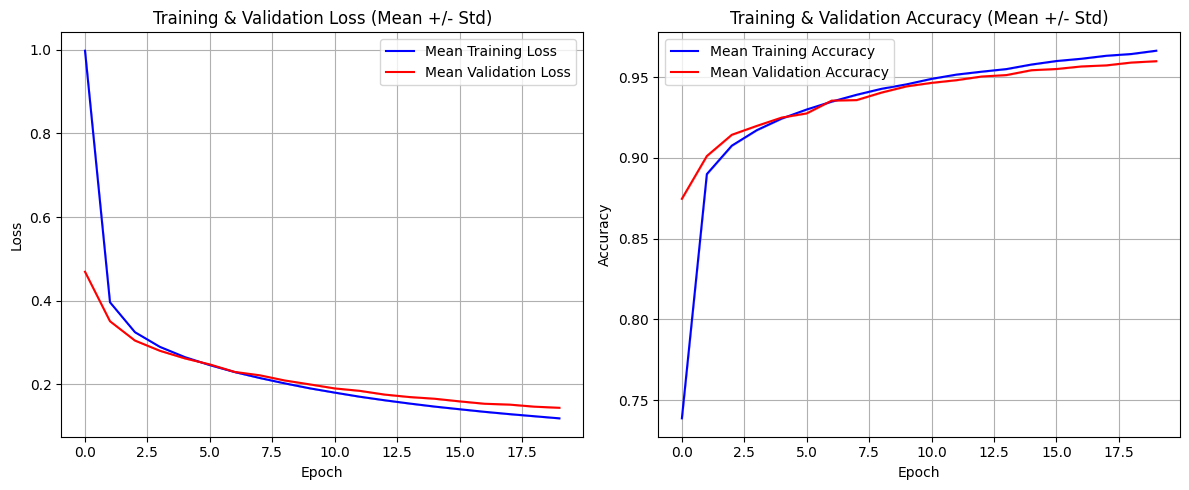

In [4]:
# Plot Training and validation loss/accuracy over epochs
plot_learning_curves_with_error_bars(all_histories)

Final Test Set Evaluation


Generating Confusion Matrix for Test Set...


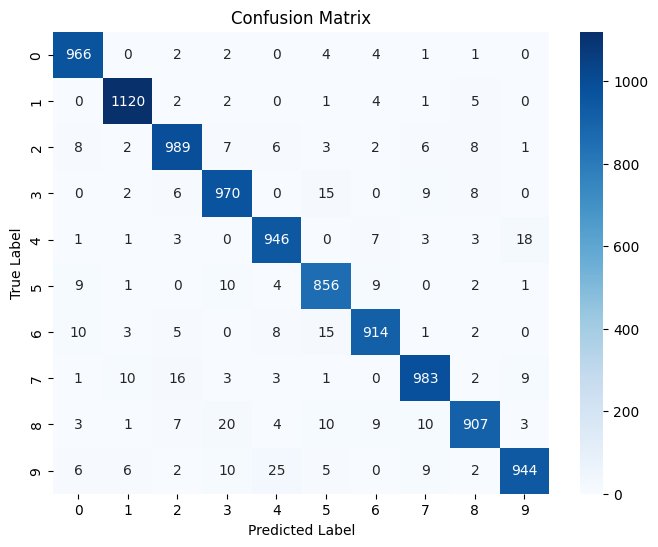


Generating Per-Class Accuracy for Test Set...
   Class  Accuracy
0      0  0.985714
1      1  0.986784
2      2  0.958333
3      3  0.960396
4      4  0.963340
5      5  0.959641
6      6  0.954071
7      7  0.956226
8      8  0.931211
9      9  0.935580


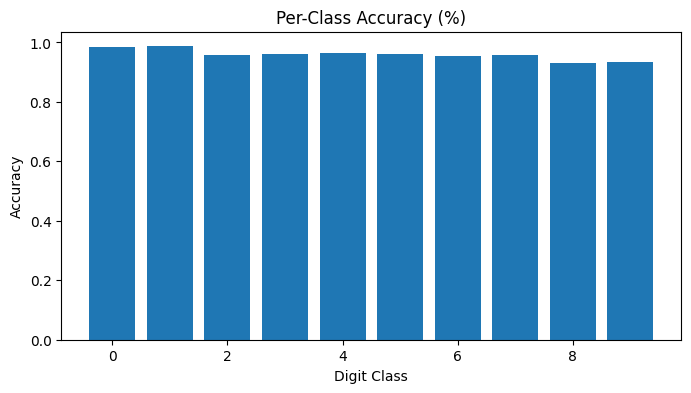

In [6]:
import numpy as np
# Get predictions for the entire test set
y_test = []
y_pred_test = []

model.eval() # Set model to evaluation mode
with torch.no_grad():
    for X, y in test_loader:
        preds = model.predict(X)
        y_test.extend(y.numpy())
        y_pred_test.extend(preds.numpy())

# Plot Confusion Matrix
print("Generating Confusion Matrix for Test Set...")
cm = plot_confusion_matrix(y_test, y_pred_test)

# Per-class accuracy analysis
print("\nGenerating Per-Class Accuracy for Test Set...")
df_acc = per_class_accuracy(cm)
plot_per_class_acc(df_acc)

The model shows steady convergence over 20 epochs. Both training and validation losses decrease smoothly 
and flatten around epoch 15,  indicating that the network has reached a stable minimum.
The validation accuracy (~96%) closely follows the training accuracy, suggesting minimal overfitting 
and good generalization. The small error bars imply consistent convergence across all 5 runs with different random seeds.
